In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import time

In [ ]:
from collections import Counter
from datetime import datetime

# **1. Previous Application**

## **1.1. Basic Overview of the Train Data**

In [ ]:
previous_application_data = pd.read_csv('../input/home-credit-default-risk/previous_application.csv')
previous_application = pd.DataFrame(previous_application_data)
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
previous_application.shape

(1670214, 37)

In [ ]:
previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [ ]:
previous_application.duplicated().sum()

0

In [ ]:
#Percentage of null values for each column

previous_application.isnull().sum()/previous_application.shape[0]*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [ ]:
previous_application.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,1670214.0,1.923089e+06,532597.958696,1.000001e+06,1.461857e+06,1.923110e+06,2.384280e+06,2845382.000
SK_ID_CURR,1670214.0,2.783572e+05,102814.823849,1.000010e+05,1.893290e+05,2.787145e+05,3.675140e+05,456255.000
AMT_ANNUITY,1297979.0,1.595512e+04,14782.137335,0.000000e+00,6.321780e+03,1.125000e+04,2.065842e+04,418058.145
AMT_APPLICATION,1670214.0,1.752339e+05,292779.762386,0.000000e+00,1.872000e+04,7.104600e+04,1.803600e+05,6905160.000
AMT_CREDIT,1670213.0,1.961140e+05,318574.616547,0.000000e+00,2.416050e+04,8.054100e+04,2.164185e+05,6905160.000
AMT_DOWN_PAYMENT,774370.0,6.697402e+03,20921.495410,-9.000000e-01,0.000000e+00,1.638000e+03,7.740000e+03,3060045.000
AMT_GOODS_PRICE,1284699.0,2.278473e+05,315396.557937,0.000000e+00,5.084100e+04,1.123200e+05,2.340000e+05,6905160.000
HOUR_APPR_PROCESS_START,1670214.0,1.248418e+01,3.334028,0.000000e+00,1.000000e+01,1.200000e+01,1.500000e+01,23.000
NFLAG_LAST_APPL_IN_DAY,1670214.0,9.964675e-01,0.059330,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000
RATE_DOWN_PAYMENT,774370.0,7.963682e-02,0.107823,-1.497876e-05,0.000000e+00,5.160508e-02,1.089091e-01,1.000


## **1.2. Previous Application Data Analysis**

### **1.2.1. Univariate Analysis: Name_Cash_Loan_Purpose**

In [ ]:
application_loan_purpose = Counter()
for purpose in previous_application['NAME_CASH_LOAN_PURPOSE'].values:
    application_loan_purpose.update(str(purpose).split(','))

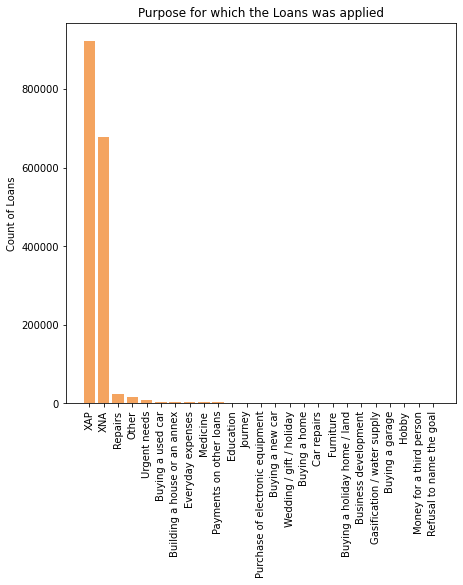

In [ ]:
purpose_dict = dict(application_loan_purpose)
sorted_purpose_dict = dict(sorted(purpose_dict.items(), key=lambda x:x[1], reverse=True))

ind_purpose = np.arange(len(sorted_purpose_dict))
plt.figure(figsize=(7,7))
p1 = plt.bar(ind_purpose, list(sorted_purpose_dict.values()),color='sandybrown')

plt.ylabel('Count of Loans')
plt.title('Purpose for which the Loans was applied')
plt.xticks(ind_purpose, list(sorted_purpose_dict.keys()), rotation=90)
plt.show()

**Observations:**


*   The purpose for most of the Loan Applications is XAP, then XNA
*   This may mean that the loan application purpose was not shared by the applicant, though we cannot be sure.

### **1.2.2. Univariate Analysis: Name_Contract_Status**

In [ ]:
application_contract_status = Counter()
for status in previous_application['NAME_CONTRACT_STATUS'].values:
    application_contract_status.update(str(status).split(','))

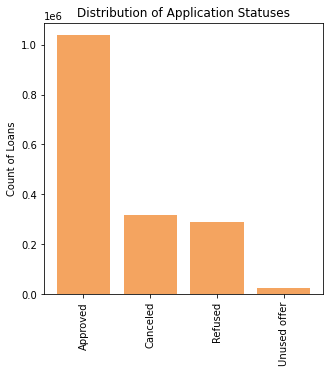

In [ ]:
contract_status_dict = dict(application_contract_status)
sorted_contract_status_dict = dict(sorted(contract_status_dict.items(), \
                                          key=lambda x:x[1], reverse=True))

ind_contract_status = np.arange(len(contract_status_dict))
plt.figure(figsize=(5,5))
p1 = plt.bar(ind_contract_status, list(sorted_contract_status_dict.values()), color='sandybrown')

plt.ylabel('Count of Loans')
plt.title('Distribution of Application Statuses')
plt.xticks(ind_contract_status, list(sorted_contract_status_dict.keys()), rotation=90)
plt.show()

**Observations:**

* Most of the previous applications for the clients were approved.
* This is followed by applications that were cancelled and refused.
* There were very few applications that were approved but the loans were unused by the applicant.

### **1.2.3. Univariate Analysis: Name_Payment_Type**

In [ ]:
application_payment_type = Counter()
for type in previous_application['NAME_PAYMENT_TYPE'].values:
    application_payment_type.update(str(type).split(','))

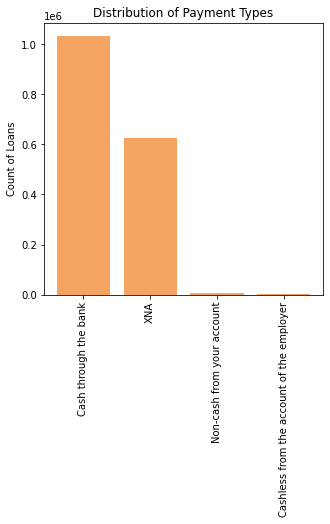

In [ ]:
payment_type_dict = dict(application_payment_type)
sorted_payment_type_dict = dict(sorted(payment_type_dict.items(), \
                                        key=lambda kv: kv[1], reverse=True))

ind_payment_type = np.arange(len(sorted_payment_type_dict))
plt.figure(figsize=(5,5))
p1 = plt.bar(ind_payment_type, list(payment_type_dict.values()),color='sandybrown')

plt.ylabel('Count of Loans')
plt.title('Distribution of Payment Types')
plt.xticks(ind_payment_type, list(sorted_payment_type_dict.keys()),rotation=90)
plt.show()

**Obsevation:**

* The Payment Type basically refers to the Payment Method that the client chose to pay for the previous application, and as we can see here, most of the clients chose to pay via Cash through the Bank for the same.
* This is followed by people whose payment type is XNA.

### **1.2.4. Univariate Analysis: Code_Reject_Reason**

In [ ]:
application_code_reject_reason = Counter()
for reason in previous_application['CODE_REJECT_REASON'].values:
    application_code_reject_reason.update(str(reason).split(','))

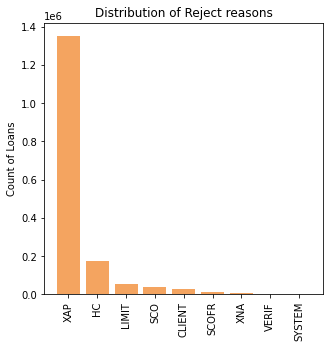

In [ ]:
code_reject_reason_dict = dict(application_code_reject_reason)
sorted_code_reject_dict = dict(sorted(code_reject_reason_dict.items(), \
                                      key = lambda x:x[1], reverse=True))

ind_code_reject_reason = np.arange(len(code_reject_reason_dict))
plt.figure(figsize=(5,5))
p1 = plt.bar(ind_code_reject_reason, list(sorted_code_reject_dict.values()), color='sandybrown')

plt.ylabel('Count of Loans')
plt.title('Distribution of Reject reasons')
plt.xticks(ind_code_reject_reason, list(sorted_code_reject_dict.keys()), rotation=90)
plt.show()

**Observation:**

* Code_Reject_Reason basically refers to the reason why the previous loan application of the client was rejected by the bank. As can be seen from here, in most of the cases XAP, was the reason provided. (Not Applicable)
* This is followed by HC as the second most prominent reason.

### **1.2.5. Univariate Analysis: Name_Client_Type**

In [ ]:
application_client_type = Counter()
for type in previous_application['NAME_CLIENT_TYPE'].values:
    application_client_type.update(str(type).split(','))

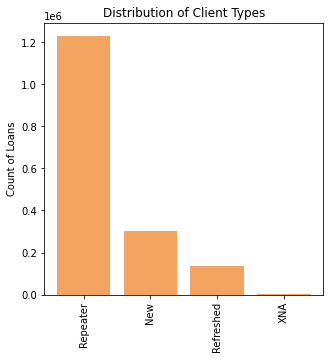

In [ ]:
client_type_dict = dict(application_client_type)
sorted_client_type_dict = dict(sorted(client_type_dict.items(), \
                                      key=lambda x:x[1], reverse=True))

ind_client_type = np.arange(len(client_type_dict))
plt.figure(figsize=(5,5))
p1 = plt.bar(ind_client_type, list(sorted_client_type_dict.values()), color='sandybrown')

plt.ylabel('Count of Loans')
plt.title('Distribution of Client Types')
plt.xticks(ind_client_type, list(sorted_client_type_dict.keys()), rotation=90)
plt.show()

**Observation:**

* This particular column defines whether the client was old or new when he/she was applying for the previous application. We can see from here that most of the applicants for the previous application were repeaters and there were very few first time applicants.

### **1.2.6. Univariate Analysis: Name_Goods_Category**

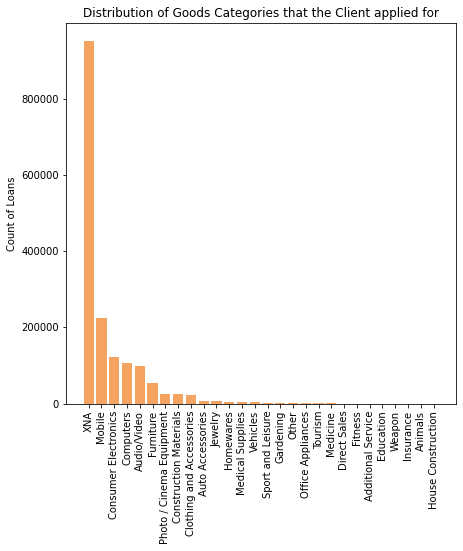

In [ ]:
application_goods_category = Counter()
for category in previous_application['NAME_GOODS_CATEGORY'].values:
    application_goods_category.update(str(category).split(','))

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
goods_category_dict = dict(application_goods_category)
sorted_goods_category_dict = dict(sorted(goods_category_dict.items(), \
                                        key=lambda x:x[1], reverse=True))

ind_good_category = np.arange(len(goods_category_dict))
plt.figure(figsize=(7,7))
p1 = plt.bar(ind_good_category, list(sorted_goods_category_dict.values()),color='sandybrown')

plt.ylabel('Count of Loans')
plt.title('Distribution of Goods Categories that the Client applied for')
plt.xticks(ind_good_category, list(sorted_goods_category_dict.keys()),rotation=90)
plt.show()

**Observations:**

* This defines the kind of goods that the client applied for in the previous application, and as can be seen, XNA is the most popular goods category followed by Mobiles.

### **1.2.7. Univariate Analysis: Name_Portfolio**

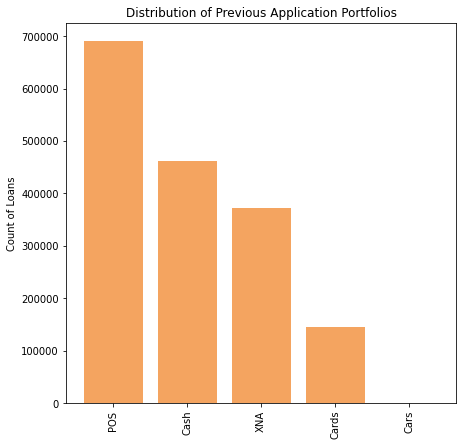

In [ ]:
application_name_portfolio = Counter()
for name in previous_application['NAME_PORTFOLIO'].values:
    application_name_portfolio.update(str(name).split(','))

application_name_dict = dict(application_name_portfolio)
sorted_name_portfolio_dict = dict(sorted(application_name_dict.items(), \
                                        key=lambda kv: kv[1], reverse=True))

ind_name_portfolio = np.arange(len(application_name_dict))
plt.figure(figsize=(7,7))
p1 = plt.bar(ind_name_portfolio, list(sorted_name_portfolio_dict.values()),color='sandybrown')

plt.ylabel('Count of Loans')
plt.title('Distribution of Previous Application Portfolios')
plt.xticks(ind_name_portfolio, list(sorted_name_portfolio_dict.keys()),rotation=90)
plt.show()

**Observations:**

* This shows that most of the previous applications were for POS, which is followed by Cash and XNA.

### **1.2.8. Univariate Analysis: Channel_Type**

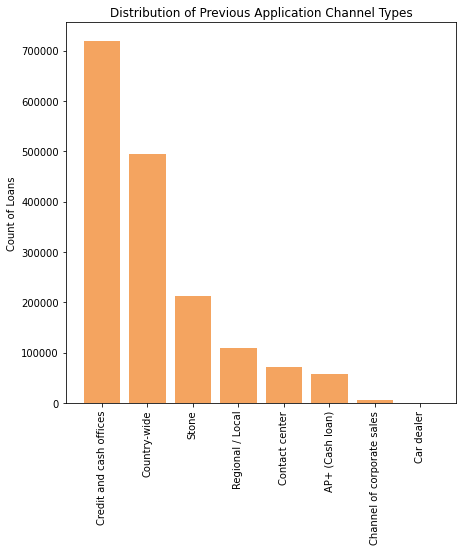

In [ ]:
application_channel_type = Counter()
for type in previous_application['CHANNEL_TYPE'].values:
    application_channel_type.update(str(type).split(','))

channel_type_dict = dict(application_channel_type)
sorted_channel_type_dict = dict(sorted(application_channel_type.items(), \
                                        key=lambda x:x[1], reverse=True))

ind_channel_type = np.arange(len(channel_type_dict))
plt.figure(figsize=(7,7))
p1 = plt.bar(ind_channel_type, list(sorted_channel_type_dict.values()),color='sandybrown')

plt.ylabel('Count of Loans')
plt.title('Distribution of Previous Application Channel Types')
plt.xticks(ind_channel_type, list(sorted_channel_type_dict.keys()),rotation=90)
plt.show()

**Observations:**

* This shows that the banks obtained most of the clients in their previous application through Credit and Cash offices, which is followed by Country-wide.

### **1.2.9. Univariate Analysis: Nflag_Insured_on_Approval**

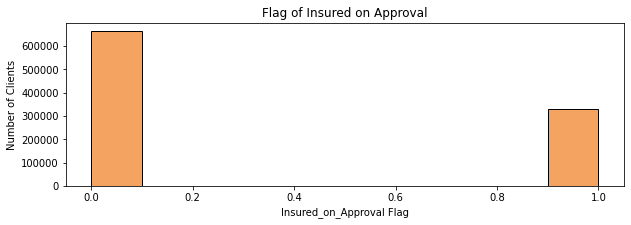

In [ ]:
plt.figure(figsize=(10,3))
plt.hist(previous_application['NFLAG_INSURED_ON_APPROVAL'].values, bins=10, \
         edgecolor='black', color='sandybrown')
plt.title('Flag of Insured on Approval')
plt.xlabel('Insured_on_Approval Flag')
plt.ylabel('Number of Clients')
plt.show()

**Observations:**

* There are much fewer clients who applied for Insurance in the previous application as compared to the number of clients who did not apply for insurance.

## **1.3. Dealing with Null Values and Outliers**
We won't be able to find outliers for Amount and Cash related features except that these values cannot be negative. Except these, we will try and deal with the remaining features.We won't be able to find outliers for Amount and Cash related features except that these values cannot be negative. Except these, we will try and deal with the remaining features.

### **1.3.1. Days_Decision**
This feature basically refers to the number of days relative to the current application that the decision made about the previous application.

In [ ]:
previous_application['DAYS_DECISION'].describe()

count    1.670214e+06
mean    -8.806797e+02
std      7.790997e+02
min     -2.922000e+03
25%     -1.300000e+03
50%     -5.810000e+02
75%     -2.800000e+02
max     -1.000000e+00
Name: DAYS_DECISION, dtype: float64

In [ ]:
print("The maximum Days_Decision (in years) across all applications = ",\
      - min(previous_application['DAYS_DECISION'].values)/365)

print("The minimum Days_Decision (in years) across all applications = ",\
      - max(previous_application['DAYS_DECISION'].values)/365)

The maximum Days_Decision (in years) across all applications =  8.005479452054795
The minimum Days_Decision (in years) across all applications =  0.0027397260273972603


**Observations:**

* This basically means that both the minimum as well as the maxium ages are admissible and there are no outliers present in the 'Days_Decision' column.

### **1.3.2. Days_First_Drawing**
This feature means that relative to application date of the current application when was the first disbursement of the previous application carried out.

In [ ]:
previous_application['DAYS_FIRST_DRAWING'].describe()

count    997149.000000
mean     342209.855039
std       88916.115833
min       -2922.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64

In [ ]:
print("The maximum Days_First_Drawing (in years) across all applications = ",\
       max(previous_application['DAYS_FIRST_DRAWING'].values)/365)

print("The minimum Days_First_Drawing (in years) across all applications = ",\
       min(previous_application['DAYS_FIRST_DRAWING'].values)/365)

The maximum Days_First_Drawing (in years) across all applications =  1000.6657534246575
The minimum Days_First_Drawing (in years) across all applications =  -8.005479452054795


**Note:**
This basically means that the maximum Days_First_Due in the table is 1000 years before the current application, which is obviously impossible. So we will first deal with removing this maximum value in this feature.

In [ ]:
previous_application['DAYS_FIRST_DRAWING'].replace(max(previous_application['DAYS_FIRST_DRAWING'].values),\
                                                  np.nan, inplace=True)

In [ ]:
previous_application['DAYS_FIRST_DRAWING']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
1670209   NaN
1670210   NaN
1670211   NaN
1670212   NaN
1670213   NaN
Name: DAYS_FIRST_DRAWING, Length: 1670214, dtype: float64

In [ ]:
previous_application['DAYS_FIRST_DRAWING'].describe()

count    62705.000000
mean     -1035.246791
std        922.710316
min      -2922.000000
25%      -1721.000000
50%       -621.000000
75%       -303.000000
max         -2.000000
Name: DAYS_FIRST_DRAWING, dtype: float64

**Observations :**

* Now we can see that both the minimum as well as maximum values across Days_First_Due are admissible (both are negative with respect to the current application).

### **1.3.3. Days_First_Due**

In [ ]:
previous_application['DAYS_FIRST_DUE'].describe()

count    997149.000000
mean      13826.269337
std       72444.869708
min       -2892.000000
25%       -1628.000000
50%        -831.000000
75%        -411.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64

In [ ]:
previous_application['DAYS_FIRST_DUE'].replace(np.nan,0, inplace= True)

print("The minimum Days_First_Due (in years) across all applications = ",\
       min(previous_application['DAYS_FIRST_DUE'].values)/365)

print("The maximum Days_First_Due (in years) across all applications = ",\
       max(previous_application['DAYS_FIRST_DUE'].values)/365)

previous_application['DAYS_FIRST_DUE'].replace(0,np.nan, inplace= True)


The minimum Days_First_Due (in years) across all applications =  -7.923287671232877
The maximum Days_First_Due (in years) across all applications =  1000.6657534246575


**Note:**
This basically means that the maximum Days_First_Due in the table is 1000 years before the current application, which is obviously impossible. So we will first deal with removing this maximum value in this feature.



In [ ]:
previous_application['DAYS_FIRST_DUE'].replace(max(previous_application['DAYS_FIRST_DUE'].values),\
                                                  np.nan, inplace=True)
previous_application['DAYS_FIRST_DUE'].describe()

count    956504.000000
mean      -1106.583027
std         790.703113
min       -2892.000000
25%       -1676.000000
50%        -874.000000
75%        -459.000000
max          -2.000000
Name: DAYS_FIRST_DUE, dtype: float64

**Observations :**

* Now we can see that both the minimum as well as maximum values across Days_First_Due are admissible (both are negative with respect to the current application).

### **1.3.4. Days_Last_Due_1st_Version**

In [ ]:
previous_application['DAYS_LAST_DUE_1ST_VERSION'].describe()

count    997149.000000
mean      33767.774054
std      106857.034789
min       -2801.000000
25%       -1242.000000
50%        -361.000000
75%         129.000000
max      365243.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64

In [ ]:
previous_application['DAYS_LAST_DUE_1ST_VERSION'].replace(np.nan,0, inplace= True)

print("The minimum Days_Last_Due_1st_Version (in years) across all applications = ",\
       np.round(min(previous_application['DAYS_LAST_DUE_1ST_VERSION'].values)/365,3))

print("The maximum Days_Last_Due_1st_Version (in years) across all applications = ",\
       np.round(max(previous_application['DAYS_LAST_DUE_1ST_VERSION'].values)/365,3))

previous_application['DAYS_LAST_DUE_1ST_VERSION'].replace(0,np.nan, inplace= True)

The minimum Days_Last_Due_1st_Version (in years) across all applications =  -7.674
The maximum Days_Last_Due_1st_Version (in years) across all applications =  1000.666


**Note:**
Again, this means that the maximum Days_Last_Due_1st_Version in the table is 1000 years before the current application, which is obviously impossible. So we will first deal with removing this maximum value in this feature.

In [ ]:
previous_application['DAYS_LAST_DUE_1ST_VERSION'].replace(max(previous_application['DAYS_LAST_DUE_1ST_VERSION'].values),\
                                                  np.nan, inplace=True)
previous_application['DAYS_LAST_DUE_1ST_VERSION'].describe()

count    902580.000000
mean       -677.687099
std         923.767799
min       -2801.000000
25%       -1360.000000
50%        -481.000000
75%          -2.000000
max        2389.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64

**Observations:**

* Again, we can see that both the minimum as well as maximum values across Days_Last_Due_1st_Version are admissible (both are negative with respect to the current application).

### **1.3.5. Days_Last_Due**

In [ ]:
previous_application['DAYS_LAST_DUE'].describe()

count    997149.000000
mean      76582.403064
std      149647.415123
min       -2889.000000
25%       -1314.000000
50%        -537.000000
75%         -74.000000
max      365243.000000
Name: DAYS_LAST_DUE, dtype: float64

In [ ]:
previous_application['DAYS_LAST_DUE'].replace(np.nan,0, inplace= True)

print("The minimum Days_Last_Due (in years) across all applications = ",\
       np.round(min(previous_application['DAYS_LAST_DUE'].values)/365,3))

print("The maximum Days_Last_Due (in years) across all applications = ",\
       np.round(max(previous_application['DAYS_LAST_DUE'].values)/365,3))

previous_application['DAYS_LAST_DUE'].replace(0,np.nan, inplace= True)

The minimum Days_Last_Due (in years) across all applications =  -7.915
The maximum Days_Last_Due (in years) across all applications =  1000.666


**Note:**
This means that the maximum Days_Last_Due in the table is 1000 years before the current application, which is impossible. So we will first deal with removing this maximum value in this feature.

In [ ]:
previous_application['DAYS_LAST_DUE'].replace(max(previous_application['DAYS_LAST_DUE'].values),\
                                                  np.nan, inplace=True)
previous_application['DAYS_LAST_DUE'].describe()

count    785928.000000
mean       -996.179128
std         752.703178
min       -2889.000000
25%       -1566.000000
50%        -801.000000
75%        -353.000000
max          -2.000000
Name: DAYS_LAST_DUE, dtype: float64

**Observations:**

* We can see here that both the minimum as well as maximum values across Days_Last_Due are admissible (both are negative with respect to the current application).

### **1.3.6. Days_Termination**

In [ ]:
previous_application['DAYS_TERMINATION'].describe()

count    997149.000000
mean      81992.343838
std      153303.516729
min       -2874.000000
25%       -1270.000000
50%        -499.000000
75%         -44.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64

In [ ]:
previous_application['DAYS_TERMINATION'].replace(np.nan,0, inplace= True)

print("The minimum Days_Termination (in years) across all applications = ",\
       np.round(min(previous_application['DAYS_TERMINATION'].values)/365,3))

print("The maximum Days_Termination (in years) across all applications = ",\
       np.round(max(previous_application['DAYS_TERMINATION'].values)/365,3))

previous_application['DAYS_TERMINATION'].replace(0,np.nan, inplace= True)

The minimum Days_Termination (in years) across all applications =  -7.874
The maximum Days_Termination (in years) across all applications =  1000.666


**Note:**
This means that the maximum Days_Termination in the table is 1000 years before the current application, which is impossible. So we will first deal with removing this maximum value in this feature.

In [ ]:
previous_application['DAYS_TERMINATION'].replace(max(previous_application['DAYS_TERMINATION'].values),\
                                                  np.nan, inplace=True)
previous_application['DAYS_TERMINATION'].describe()

count    771236.000000
mean       -978.375222
std         749.134297
min       -2874.000000
25%       -1539.000000
50%        -780.000000
75%        -337.000000
max          -2.000000
Name: DAYS_TERMINATION, dtype: float64

**Observations:**

* Both the minimum as well as maximum values across Days_Termination are admissible (both are negative with respect to the current application).

# **2. POS Cash Balance Dataset**


## **2.1. Basic Overview of the POS Cash Balance Data**

In [ ]:
pos_cash_balance = pd.read_csv('../input/home-credit-default-risk/POS_CASH_balance.csv')
pos_cash_balance

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


In [ ]:
pos_cash_balance.shape

(10001358, 8)

In [ ]:
pos_cash_balance.duplicated().sum()

0

In [ ]:
pos_cash_balance.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [ ]:
pos_cash_balance.isnull().sum()/pos_cash_balance.shape[0]*100

SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
MONTHS_BALANCE           0.000000
CNT_INSTALMENT           0.260675
CNT_INSTALMENT_FUTURE    0.260835
NAME_CONTRACT_STATUS     0.000000
SK_DPD                   0.000000
SK_DPD_DEF               0.000000
dtype: float64

In [ ]:
pos_cash_balance.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,10001358.0,1.903217e+06,535846.530722,1000001.0,1434405.0,1896565.0,2368963.0,2843499.0
SK_ID_CURR,10001358.0,2.784039e+05,102763.745090,100001.0,189550.0,278654.0,367429.0,456255.0
MONTHS_BALANCE,10001358.0,-3.501259e+01,26.066570,-96.0,-54.0,-28.0,-13.0,-1.0
CNT_INSTALMENT,9975287.0,1.708965e+01,11.995056,1.0,10.0,12.0,24.0,92.0
CNT_INSTALMENT_FUTURE,9975271.0,1.048384e+01,11.109058,0.0,3.0,7.0,14.0,85.0
SK_DPD,10001358.0,1.160693e+01,132.714043,0.0,0.0,0.0,0.0,4231.0
SK_DPD_DEF,10001358.0,6.544684e-01,32.762491,0.0,0.0,0.0,0.0,3595.0


## **2.2. POS Cash Balance Data Analysis**

### **2.2.1. Univariate Analysis: Month_Balance**


Months_Balance refers to the Month of balance relative to the application date (0 could mean the same as -1 because as many banks are not updating the information to the Credit Bureau with regularity).

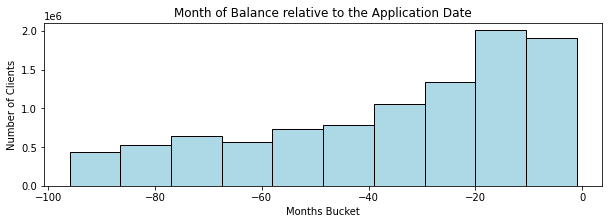

In [ ]:
plt.figure(figsize=(10,3))
plt.hist(pos_cash_balance['MONTHS_BALANCE'].values, bins=10, edgecolor='black', color='lightblue')
plt.title('Month of Balance relative to the Application Date')
plt.xlabel('Months Bucket')
plt.ylabel('Number of Clients')
plt.show()

**Observations:**

* The Months_Balance for a large number of the clients is between 10 and 20 months before the date of application.
* This is followed by clients with Months_Balance less than 10 months.

### **2.2.2. Univarate Analysis: Cnt_Instalment**

Cnt_Installment refers to the term of the previous credit (which can change over the period of time).

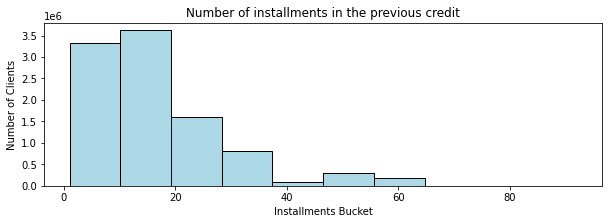

In [ ]:
plt.figure(figsize=(10,3))
plt.hist(pos_cash_balance['CNT_INSTALMENT'].values, bins=10, edgecolor='black', color='lightblue')
plt.title('Number of installments in the previous credit')
plt.xlabel('Installments Bucket')
plt.ylabel('Number of Clients')
plt.show()

**Observation:**

* The Number of installments in the previous credit for most clients lies between 10 and 20

* This is followed by clients whose installment count is less than 10 months

### **2.2.3. Univariate Analysis: Cnt_Installment_Future**

This feature refers to the number of installments left to pay on the previous credit.

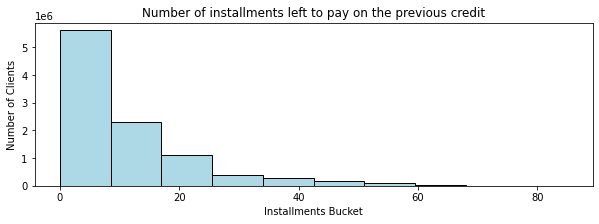

In [ ]:
plt.figure(figsize=(10,3))
plt.hist(pos_cash_balance['CNT_INSTALMENT_FUTURE'].values, bins=10, edgecolor='black', color='lightblue')
plt.title('Number of installments left to pay on the previous credit')
plt.xlabel('Installments Bucket')
plt.ylabel('Number of Clients')
plt.show()

**Observations:**

* Most of the clients have less than 10 installments left to pay on the previous credit.
* This is followed by clients whose installment count is between 10 and 20.

### **2.2.4. Univariate Analysis: Name_Contract_Status**

In [ ]:
pos_cash_balance["NAME_CONTRACT_STATUS"].value_counts(normalize= True) * 100

Active                   91.498764
Completed                 7.447819
Signed                    0.872482
Demand                    0.070640
Returned to the store     0.054603
Approved                  0.049163
Amortized debt            0.006359
Canceled                  0.000150
XNA                       0.000020
Name: NAME_CONTRACT_STATUS, dtype: float64

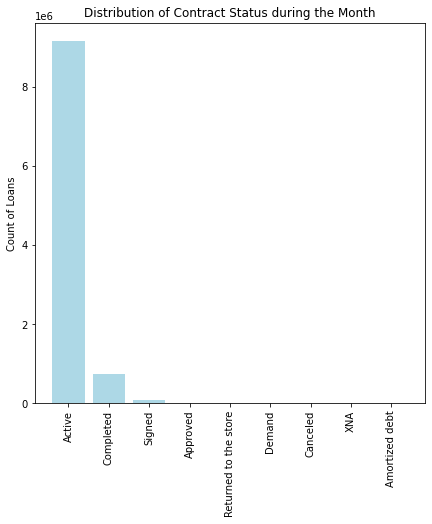

In [ ]:
balance_contract_status = Counter()
for status in pos_cash_balance['NAME_CONTRACT_STATUS'].values:
    balance_contract_status.update(status.split(','))

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
contract_status_dict = dict(balance_contract_status)
sorted_contract_status = dict(sorted(balance_contract_status.items(), \
                                        key=lambda kv: kv[1], reverse=True))

ind_12 = np.arange(len(contract_status_dict))
plt.figure(figsize=(7,7))
p1 = plt.bar(ind_12, list(contract_status_dict.values()),color='lightblue')

plt.ylabel('Count of Loans')
plt.title('Distribution of Contract Status during the Month')
plt.xticks(ind_12, list(contract_status_dict.keys()),rotation=90)
plt.show()

**Observations:**

* The Name_Contract_Status is Active in the majority of the cases.